y_hat = 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1
 2 2 2 2 1 1 1 1 1 1 0 0 2 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2
 2 1]
y_hat_prob = 
[[ 0.87657528  0.08222018  0.04120455]
 [ 0.70878524  0.25734725  0.0338675 ]
 [ 0.8222077   0.15871946  0.01907284]
 [ 0.79219681  0.1921252   0.01567799]
 [ 0.90597526  0.06249879  0.03152595]
 [ 0.90844245  0.02832542  0.06323213]
 [ 0.88656883  0.09925984  0.01417132]
 [ 0.86083083  0.10452077  0.0346484 ]
 [ 0.72405324  0.26551478  0.01043198]
 [ 0.76113188  0.20697741  0.03189071]
 [ 0.87970948  0.04972353  0.070567  ]
 [ 0.87629535  0.10155572  0.02214893]
 [ 0.7269432   0.24675499  0.02630181]
 [ 0.77039575  0.22151994  0.00808431]
 [ 0.84803539  0.0215066   0.130458  ]
 [ 0.90516407  0.00677707  0.08805886]
 [ 0.90844245  0.02832542  0.06323213]
 [ 0.876

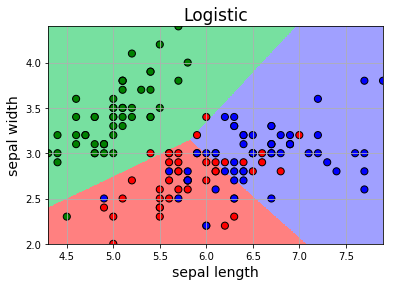

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

data = pd.read_csv('http://aima.cs.berkeley.edu/data/iris.csv', header=None)
iris_types = data[4].unique()
for i, type in enumerate(iris_types):
	data.set_value(data[4] == type, 4, i)
x, y = np.split(data.values, (4,), axis=1)
x = x.astype(np.float)
y = y.astype(np.int)
# 仅使用前两列特征
x = x[:, :2]
lr = Pipeline([('sc', StandardScaler()),
                ('clf', LogisticRegression()) ])
lr.fit(x, y.ravel())
y_hat = lr.predict(x)
y_hat_prob = lr.predict_proba(x)
np.set_printoptions(suppress=True)
print 'y_hat = \n', y_hat
print 'y_hat_prob = \n', y_hat_prob
print u'accur：%.2f%%' % (100*np.mean(y_hat == y.ravel()))

# 画图
N, M = 500, 500     # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)   # 测试点


cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = lr.predict(x_test)                  # 预测值
y_hat = y_hat.reshape(x1.shape)                 # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)    # 样本的显示
plt.xlabel(u'sepal length', fontsize=14)
plt.ylabel(u'sepal width', fontsize=14)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.title(u'Logistic', fontsize=17)
plt.show()

y_hat = 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1
 2 2 2 2 1 1 1 1 1 1 0 0 2 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2
 2 1]
y_hat_prob = 
[[ 0.87657528  0.08222018  0.04120455]
 [ 0.70878524  0.25734725  0.0338675 ]
 [ 0.8222077   0.15871946  0.01907284]
 [ 0.79219681  0.1921252   0.01567799]
 [ 0.90597526  0.06249879  0.03152595]
 [ 0.90844245  0.02832542  0.06323213]
 [ 0.88656883  0.09925984  0.01417132]
 [ 0.86083083  0.10452077  0.0346484 ]
 [ 0.72405324  0.26551478  0.01043198]
 [ 0.76113188  0.20697741  0.03189071]
 [ 0.87970948  0.04972353  0.070567  ]
 [ 0.87629535  0.10155572  0.02214893]
 [ 0.7269432   0.24675499  0.02630181]
 [ 0.77039575  0.22151994  0.00808431]
 [ 0.84803539  0.0215066   0.130458  ]
 [ 0.90516407  0.00677707  0.08805886]
 [ 0.90844245  0.02832542  0.06323213]
 [ 0.876

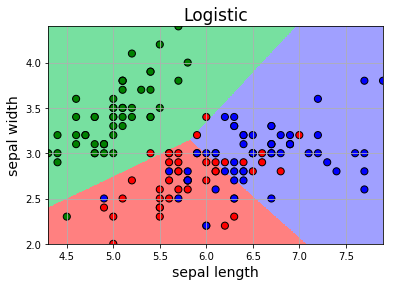

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

data = pd.read_csv('http://aima.cs.berkeley.edu/data/iris.csv', header=None)
iris_types = data[4].unique()
for i, type in enumerate(iris_types):
	data.set_value(data[4] == type, 4, i)
x, y = np.split(data.values, (4,), axis=1)
x = x.astype(np.float)
y = y.astype(np.int)
# 仅使用前两列特征
x = x[:, :2]
lr = Pipeline([('sc', StandardScaler()),
                ('clf', LogisticRegression()) ])
lr.fit(x, y.ravel())
y_hat = lr.predict(x)
y_hat_prob = lr.predict_proba(x)
np.set_printoptions(suppress=True)
print 'y_hat = \n', y_hat
print 'y_hat_prob = \n', y_hat_prob
print u'accur：%.2f%%' % (100*np.mean(y_hat == y.ravel()))

# 画图
N, M = 500, 500     # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)   # 测试点


cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = lr.predict(x_test)                  # 预测值
y_hat = y_hat.reshape(x1.shape)                 # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)    # 样本的显示
plt.xlabel(u'sepal length', fontsize=14)
plt.ylabel(u'sepal width', fontsize=14)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.title(u'Logistic', fontsize=17)
plt.show()